In questo esercizio sfruttiamo le reti neurali per dei fit di funzioni.


Il primo caso considerato è quello della funzione $f(x)=2x + 1$ in cui i dati che abbiamo a disposizione sono stati eseguiti senza errori.

In [2]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [3]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500) #vettore con 500 dati
# la maggior parte dei dati va nel training
x_valid = np.random.uniform(-1, 1, 50) # usato per valutare la loss function
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# l'errore lo metto sulle y

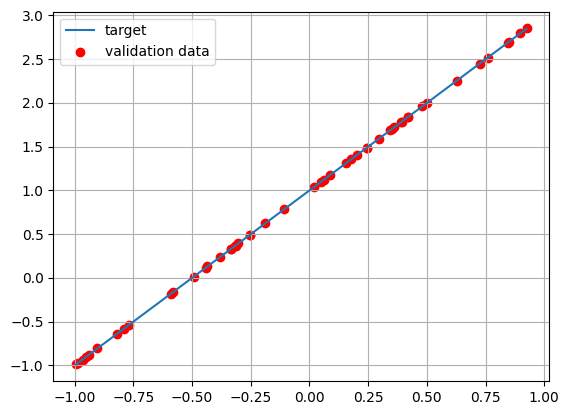

In [4]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()# sequenza di neuroni
model.add(Dense(1, input_shape=(1,))) # creo un singolo neurone

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
# usato stochastic gradient discend con loss_function dei minimi quadrati

In [16]:
# get a summary of our composed model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# ogni volta che eseguo questa cella alleno un pò di più la rete neurale

# fit the model using training dataset
# over 10 epochs of 32 batch size each

# batch_size è la dimensione dei gruppi con cui calcolo il gradiente per ottimizzare i parametri 

# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

# se non ho un prefisso significa che è la quantità relativa ai dati di training, se ho val significa che la quantità si riferisce ai dati di validazione


Epoch 1/30
16/16 [==============================] - 0s 9ms/step - loss: 1.0780 - mse: 1.0780 - val_loss: 0.7288 - val_mse: 0.7288
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6563 - mse: 0.6563 - val_loss: 0.4536 - val_mse: 0.4536
Epoch 3/30
16/16 [==============================] - 0s 3ms/step - loss: 0.4205 - mse: 0.4205 - val_loss: 0.2948 - val_mse: 0.2948
Epoch 4/30
16/16 [==============================] - 0s 3ms/step - loss: 0.2804 - mse: 0.2804 - val_loss: 0.2008 - val_mse: 0.2008
Epoch 5/30
16/16 [==============================] - 0s 6ms/step - loss: 0.1951 - mse: 0.1951 - val_loss: 0.1438 - val_mse: 0.1438
Epoch 6/30
16/16 [==============================] - 0s 4ms/step - loss: 0.1417 - mse: 0.1417 - val_loss: 0.1067 - val_mse: 0.1067
Epoch 7/30
16/16 [==============================] - 0s 3ms/step - loss: 0.1060 - mse: 0.1060 - val_loss: 0.0814 - val_mse: 0.0814
Epoch 8/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0811 - mse: 0.08

In [17]:
# return weights and biases
# V=["fakljf"]
# print(V)
w=model.get_weights()
print(w)
# lista con 2 ndarrays, ognuno con una lista di pesi e l'altro con la lista dei bias

# print(type(w[0]))
# print(w[1])
print("layer nodes weights: ", w[0].shape)
print("layer bias weights: ", w[1].shape)

[array([[0.76010406]], dtype=float32), array([0.], dtype=float32)]
layer nodes weights:  (1, 1)
layer bias weights:  (1,)


In [18]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)


# Il parametro verbose controlla il livello di dettaglio delle informazioni di che Keras stampa durante l'addestramento.
# I valori possibili sono:
# 0: Nessun output (silenzioso).
# 1: output dopo ogni epoca.
# 2: output di ogni epoca un pò meno dettagliato della barra di progresso.


# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# se la loss function è troppo vicina a 0 è un problema perchè significa che ha imparato gli errori

3/3 [==============================] - 0s 3ms/step - loss: 1.3309 - mse: 1.3309

Test loss: 1.3308757543563843
Test accuracy: 1.3308757543563843


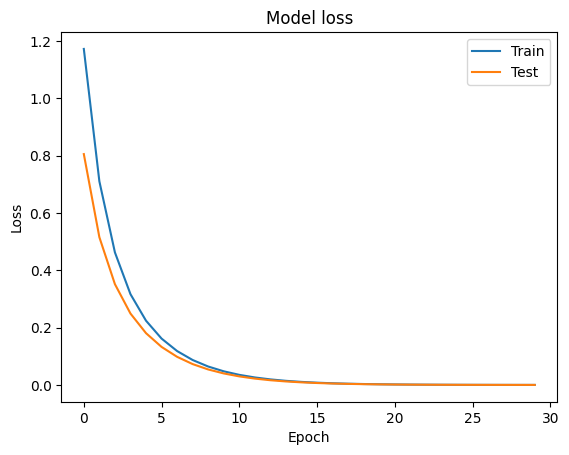

In [19]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 1ms/step


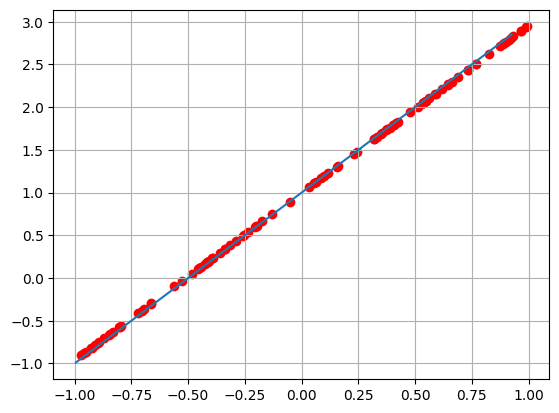

In [11]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

# 11.1


Adesso considero la possibilità che i dati raccolti siano stati "sporcati", da un rumore gaussiano con deviazione standard $\sigma$, dall'andamento teorico.

## al variare del numero di $N_{epoch}$

Voglio indagare come variano le performance del neurone al variare del numero di epoche in cui lo alleno ( $N_{epoch}$ ). 

Nella cella successiva è stata fatta la scelta $\sigma = 0.2$

Epoch 1/20
16/16 [==============================] - 0s 7ms/step - loss: 1.2625 - mse: 1.2625 - val_loss: 0.8249 - val_mse: 0.8249
Epoch 2/20
16/16 [==============================] - 0s 3ms/step - loss: 0.8064 - mse: 0.8064 - val_loss: 0.5402 - val_mse: 0.5402
Epoch 3/20
16/16 [==============================] - 0s 3ms/step - loss: 0.5423 - mse: 0.5423 - val_loss: 0.3773 - val_mse: 0.3773
Epoch 4/20
16/16 [==============================] - 0s 3ms/step - loss: 0.3855 - mse: 0.3855 - val_loss: 0.2784 - val_mse: 0.2784
Epoch 5/20
16/16 [==============================] - 0s 4ms/step - loss: 0.2870 - mse: 0.2870 - val_loss: 0.2153 - val_mse: 0.2153
Epoch 6/20
16/16 [==============================] - 0s 3ms/step - loss: 0.2224 - mse: 0.2224 - val_loss: 0.1727 - val_mse: 0.1727
Epoch 7/20
16/16 [==============================] - 0s 3ms/step - loss: 0.1784 - mse: 0.1784 - val_loss: 0.1426 - val_mse: 0.1426
Epoch 8/20
16/16 [==============================] - 0s 3ms/step - loss: 0.1472 - mse: 0.14

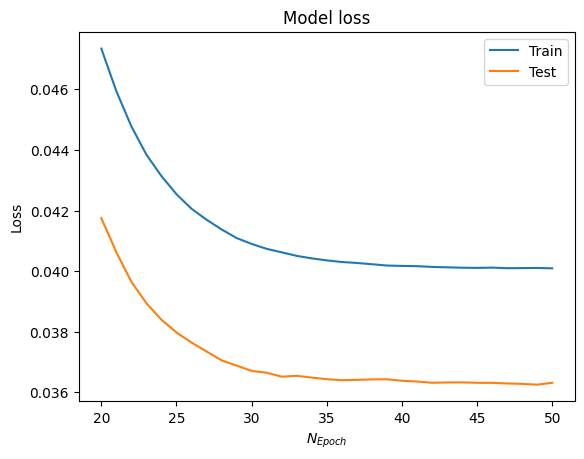

In [20]:
V_loss=[]
V_val_loss=[]
N_ep=np.linspace(20, 50, 31)
# print(N_ep)

m = 2 # slope
b = 1 # intersect


x_train = np.random.uniform(-1, 1, 500) #vettore con 500 dati
x_valid = np.random.uniform(-1, 1, 50) # usato per valutare la loss function
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

# print(x_train)
# print(x_valid)


sigma = 0.2 # noise standard deviation

y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

model = tf.keras.Sequential()# sequenza di neuroni
model.add(Dense(1, input_shape=(1,))) # creo un singolo neurone


initial_weights = model.get_weights()

for i in range(len(N_ep)):
	model.set_weights(initial_weights) # fatto in modo che con ogni N_ep uso gli stessi pesi iniziali

	# compile the model choosing optimizer, loss and metrics objects
	model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

	history = model.fit(x=x_train, y=y_train, 
			batch_size=32, epochs=int(N_ep[i]),
			shuffle=True, # a good idea is to shuffle input before at each epoch
			validation_data=(x_valid, y_valid))
	
	score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
	V_loss.append(history.history['loss'][len(history.history['loss'])-1])
	V_val_loss.append(history.history['val_loss'][len(history.history['val_loss'])-1])
	# prese le loss function dell'ultima epoca

plt.plot(N_ep, V_loss)
plt.plot(N_ep, V_val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel(r'$N_{Epoch}$')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

Come ci si aspetta l'aumentare del numero di epoche di allenamento porta il neurone a migliorare.

## al variare del numero di dati di allenamento

3/3 [==============================] - 0s 2ms/step - loss: 1.0371e-04 - mse: 1.0371e-04


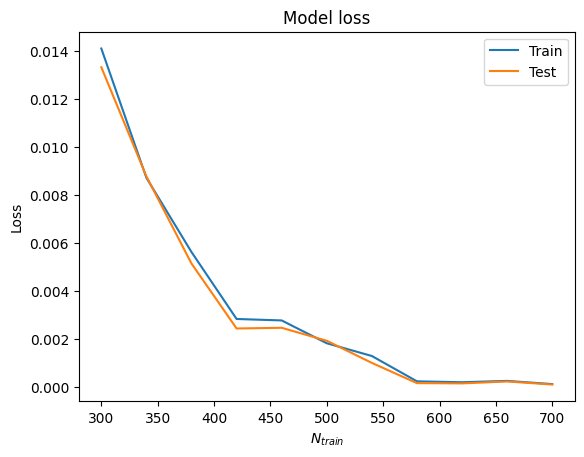

In [24]:
np.random.seed(0)
tf.random.set_seed(0) 
V_loss=[]
V_val_loss=[]
V_N_train=np.linspace(300, 700, 11)
# print(V_N_train)

m = 2 # slope
b = 1 # intersect

N_ep=30
sigma = 0.

model = tf.keras.Sequential()# sequenza di neuroni
model.add(Dense(1, input_shape=(1,))) # creo un singolo neurone


# initial_weights = model.get_weights() # i pesi sono scelti in modo random ogni volta senza usare lo stesso seed
initial_weights = [np.array([[0.5]]), np.array([0.1])]
# print (initial_weights)

	

for i in range(len(V_N_train)):
	model.set_weights(initial_weights)

	x_train = np.random.uniform(-1, 1, int(V_N_train[i]))
	x_valid = np.random.uniform(-1, 1, int(V_N_train[i]/10))
	x_valid.sort()
	y_target = m * x_valid + b # ideal (target) linear function


	y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
	y_valid = np.random.normal(m * x_valid + b, sigma)

	# compile the model choosing optimizer, loss and metrics objects
	model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

	history = model.fit(x=x_train, y=y_train, 
			batch_size=32, verbose=0, epochs=int(N_ep),
			shuffle=True, # a good idea is to shuffle input before at each epoch
			validation_data=(x_valid, y_valid))
	
	score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
	V_loss.append(history.history['loss'][len(history.history['loss'])-1])
	V_val_loss.append(history.history['val_loss'][len(history.history['val_loss'])-1])
	# prese le loss function dell'ultima epoca

plt.plot(V_N_train, V_loss)
plt.plot(V_N_train, V_val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel(r'$N_{train}$')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

Nuovamente il risultato mostra quanto ci aspettiamo, ossia che (in media) allenare una rete neurale con più dati ne migliora le sue prestazioni.

## al variare di $\sigma$

2/2 [==============================] - 0s 4ms/step - loss: 1.0565 - mse: 1.0565


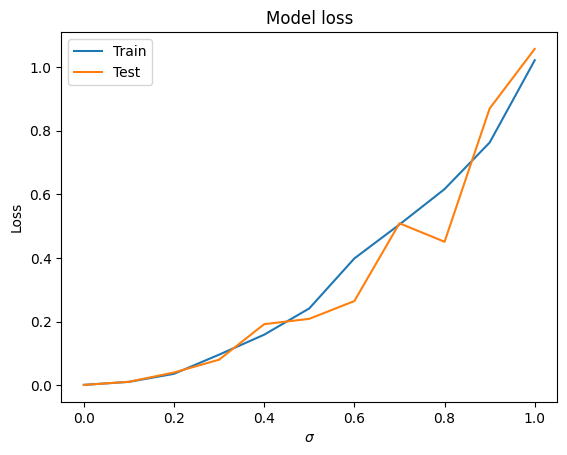

In [25]:
np.random.seed(0)
tf.random.set_seed(0)

V_loss=[]
V_val_loss=[]
N_train=500
sigma=np.linspace(0, 1, 11)

# print(sigma)

m = 2 # slope
b = 1 # intersect

N_ep=30

model = tf.keras.Sequential()# sequenza di neuroni
model.add(Dense(1, input_shape=(1,))) # creo un singolo neurone

initial_weights = [np.array([[0.5]]), np.array([0.1])]
# scelgo io i pesi iniziali in modo da avere sempre lo stesso output

for i in range(len(sigma)):
	model.set_weights(initial_weights)
	x_train = np.random.uniform(-1, 1, int(N_train))
	x_valid = np.random.uniform(-1, 1, int(N_train/10))
	x_valid.sort()
	y_target = m * x_valid + b # ideal (target) linear function


	y_train = np.random.normal(m * x_train + b, sigma[i]) # actual measures from which we want to guess regression parameters
	y_valid = np.random.normal(m * x_valid + b, sigma[i])
	
	# compile the model choosing optimizer, loss and metrics objects
	model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

	history = model.fit(x=x_train, y=y_train, 
			batch_size=32, verbose=0, epochs=int(N_ep),
			shuffle=True, # a good idea is to shuffle input before at each epoch
			validation_data=(x_valid, y_valid))
	
	score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
	V_loss.append(history.history['loss'][len(history.history['loss'])-1])
	V_val_loss.append(history.history['val_loss'][len(history.history['val_loss'])-1])
	# prese le loss function dell'ultima epoca

plt.plot(sigma, V_loss)
plt.plot(sigma, V_val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel(r'$\sigma$')
plt.legend(['Train', 'Test'], loc='best')
plt.show()


Più i dati risultano sporcati e più, come ci si aspetta, il neurone fatica a prevedere l'andamento della funzione.

# 11.2


Adesso la funzione che siamo interessati a fittare è:

$$
f(x)=4-3x-2x^2+3x^3
$$
nell'intervallo: $x \in [-1,1]$.

## Adam

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
 dense_12 (Dense)            (None, 2)                 4         
                                                                 
 dense_13 (Dense)            (None, 31)                93        
                                                                 
 dense_14 (Dense)            (None, 24)                768       
                                                                 
 dense_15 (Dense)            (None, 8)                 200       
                                                                 
 dense_16 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1076 (4.20 KB)
Trainable params: 1076 (

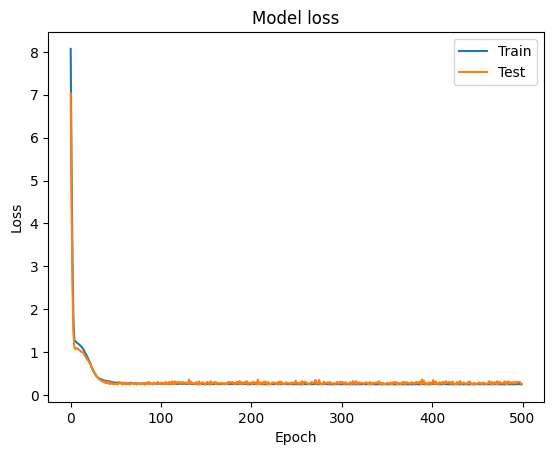

4/4 [==============================] - 0s 2ms/step


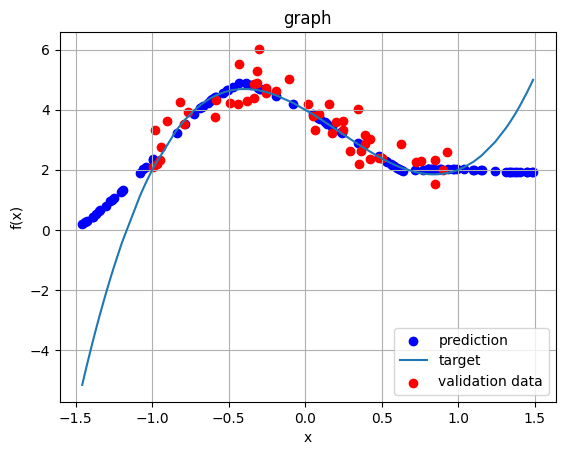

In [26]:
np.random.seed(0)
tf.random.set_seed(0) 

a=4
b=-3
c=-2
d=3

N_train=500
sigma=0.5
# print(sigma)

N_ep=500
np.random.seed(0)

model = tf.keras.Sequential()# sequenza di neuroni
model.add(Dense(1, input_shape=(1,)))
model.add(Dense(2, activation='relu'))
model.add(Dense(31, activation='sigmoid'))# non posso avere funzioni di attivazioni diverse per lo stesso layer
model.add(Dense(24, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
# i pesi sono quelli associati all'input
# se ho più layers ogni layer ha pesi che posso pensare come una matrice di dimensione: # neuroni layer prima, # neuroni layer considerato
# l'elemento i-j della matrice corrisponde corrisponde al peso associato al collegamento tra il neurone i del layer precedente e il neurone j
# il secondo nparray sono invece i bias (pari al numero di neuroni)

# weights_layer1 = [np.array([[0.1]]), np.array([0.1])]
# weights_layer2 = [np.array([[0, 0.1] ]), np.array(0.2)]
# weights_layer3 = [np.array([[0.5, 0.3, 0.1], [0.4, 0.2, 0.6]]), np.array([0.1, 0.2, 0.3])]
# weights_layer4 = [np.array([[0.4], [0.2], [0.6]]), np.array([0.2])]

model.summary()

# print(model.layers)


# model.layers[0].set_weights(weights_layer1)
# model.layers[1].set_weights(weights_layer2)
# model.layers[2].set_weights(weights_layer3)
# model.layers[3].set_weights(weights_layer4)


	

x_train = np.random.uniform(-1, 1, int(N_train))
x_valid = np.random.uniform(-1, 1, int(N_train/10))
x_valid.sort()
y_target = a+ b * x_valid + c * (x_valid**2) + d*(x_valid**3)  # ideal (target) linear function


y_train = np.random.normal(a+ b * x_train + c * (x_train**2) + d*(x_train**3), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a+ b * x_valid + c * (x_valid**2) + d*(x_valid**3), sigma)
# print(len(x_train))
# print(len(y_train))


# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

history = model.fit(x=x_train, y=y_train, 
		batch_size=32, verbose=1, epochs=int(N_ep),
		shuffle=True, # a good idea is to shuffle input before at each epoch
		validation_data=(x_valid, y_valid))

score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
# prese le loss function dell'ultima epoca
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()



x_predicted = np.random.uniform(-1.5, 1.5, 100)
x_predicted.sort()
y_target = a+ b * x_predicted + c * (x_predicted**2) + d*(x_predicted**3) 
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted, color='b', label='prediction')
plt.plot(x_predicted, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.grid(True)
plt.title('graph')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()


All'interno dell'intervallo in cui la rete neurale si è allenata la funzione teorica risulta ben approssimata.

## SGD e una struttura con molti meno parametri

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 1)                 2         
                                                                 
 dense_60 (Dense)            (None, 2)                 4         
                                                                 
 dense_61 (Dense)            (None, 3)                 9         
                                                                 
 dense_62 (Dense)            (None, 1)                 4         
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
16/16 [==============================] - 0s 10ms/step - loss: 4.4473 - mse: 4.4473 - val_loss: 1.9134 - val_mse: 1.9134
Epoch 2/500
16/16 [

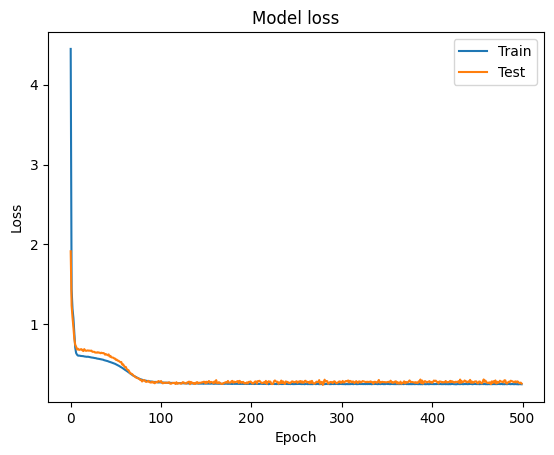

4/4 [==============================] - 0s 2ms/step


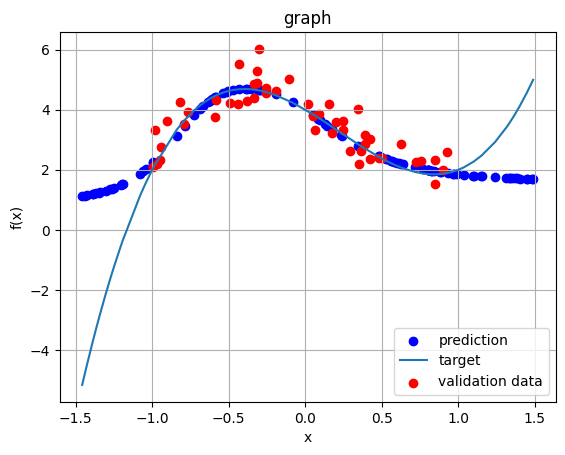

In [35]:
np.random.seed(0)
tf.random.set_seed(0) 

a=4
b=-3
c=-2
d=3

N_train=500
sigma=0.5
# print(sigma)

N_ep=500
np.random.seed(0)

model = tf.keras.Sequential()# sequenza di neuroni
model.add(Dense(1, input_shape=(1,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(1))

model.summary()


	

x_train = np.random.uniform(-1, 1, int(N_train))
x_valid = np.random.uniform(-1, 1, int(N_train/10))
x_valid.sort()


y_train = np.random.normal(a+ b * x_train + c * (x_train**2) + d*(x_train**3), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a+ b * x_valid + c * (x_valid**2) + d*(x_valid**3), sigma)
# print(len(x_train))
# print(len(y_train))


# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mse'])

history = model.fit(x=x_train, y=y_train, 
		batch_size=32, verbose=1, epochs=int(N_ep),
		shuffle=True, 
		validation_data=(x_valid, y_valid))

score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()



x_predicted = np.random.uniform(-1.5, 1.5, 100)
x_predicted.sort()
y_target = a+ b * x_predicted + c * (x_predicted**2) + d*(x_predicted**3)  # ideal (target) linear function
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted, color='b', label='prediction')
plt.plot(x_predicted, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.grid(True)
plt.title('graph')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()

<!-- Data la semplicità del secondo modello rispetto al primo è quindi evidente che la seconda predizione risulta peggiore della prima. Nel secondo modello infatti la rete neurale ha meno gradi di libertà in cui spostarsi nello spazio dei parametri.   -->
Nonostante questa rete neurale abbia molti meno parametri della precedente riesce lo stesso a prevedere in modo preciso l'andamento della funzione nell'intervallo desiderato.  
Nonostante l'abbondanza di parametri nel primo modello di rete neurale non vi era però alcuna evidenza di overfitting.  
In entrambi i casi i dati al di fuori dell'intervallo di allenamento sono molto lontani dalla distribuzione reale, questo ce lo si aspetta in quanto, a differenza dell'esercizio precedente, il nostro sistema di neuroni non ha un output con la stessa forma della  funzione teorica. Questa funzione è infatti ignota e il codice si limita a riconoscere pattern a partire dai dati su cui si è allenato.

# 11.3

La funzione che siamo interessati a fittare adesso è la seguente:  
$f(x,y) = \sin(x^2+y^2)$ con: $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_104 (Dense)           (None, 2)                 6         
                                                                 
 dense_105 (Dense)           (None, 2)                 6         
                                                                 
 dense_106 (Dense)           (None, 31)                93        
                                                                 
 dense_107 (Dense)           (None, 24)                768       
                                                                 
 dense_108 (Dense)           (None, 8)                 200       
                                                                 
 dense_109 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1082 (4.23 KB)
Trainable params: 1082 (

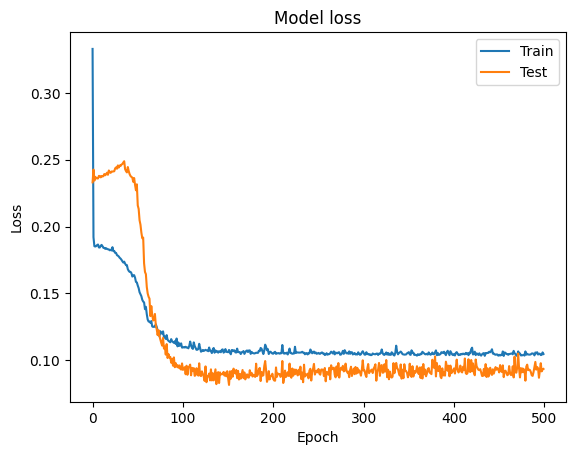

4/4 [==============================] - 0s 3ms/step


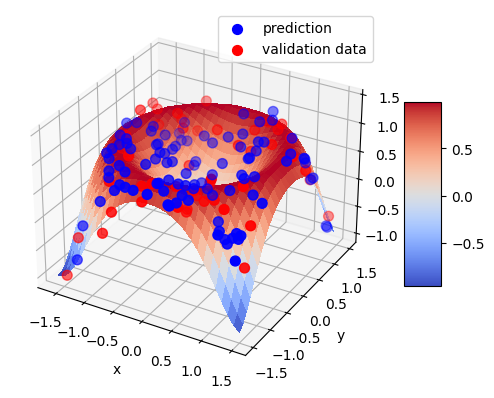

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import os

os.environ['PYTHONHASHSEED'] = '0'

def funz(x_, y_):
	return np.sin(((x_)**2)+((y_)**2))

np.random.seed(0)
tf.random.set_seed(0) 

N_train=500
sigma=0.2
N_ep=500


model = tf.keras.Sequential()
model.add(Dense(2, input_shape=(2,)))
model.add(Dense(2, activation='relu'))
model.add(Dense(31, activation='sigmoid'))
model.add(Dense(24, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.summary()


x_train = np.random.uniform(-1.5, 1.5, int(N_train))
y_train = np.random.uniform(-1.5, 1.5, int(N_train))

x_valid = np.random.uniform(-1.5, 1.5, int(N_train/10))
y_valid = np.random.uniform(-1.5, 1.5, int(N_train/10))


f_train = np.random.normal(funz(x_train, y_train), sigma)
f_valid = np.random.normal(funz(x_valid, y_valid), sigma)

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

history = model.fit(x=np.column_stack((x_train, y_train)), y=f_train, 
		batch_size=32, verbose=1, epochs=int(N_ep),
		shuffle=True, 
		validation_data=(np.column_stack((x_valid, y_valid)), f_valid))

score = model.evaluate(np.column_stack((x_valid, y_valid)), f_valid, batch_size=32, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()



x_predicted = np.random.uniform(-1.5, 1.5, 100)
y_predicted= np.random.uniform(-1.5, 1.5, 100)
f_predicted = model.predict(np.column_stack((x_predicted, y_predicted)))


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
x_target = np.arange(-1.6, 1.6, 0.1)
y_target = np.arange(-1.5, 1.5, 0.1)
x_target, y_target = np.meshgrid(x_target, y_target)
f_target = np.sin(x_target**2 + y_target**2)

surf = ax.plot_surface(x_target, y_target, f_target, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)



fig.colorbar(surf, shrink=0.5, aspect=5)
ax.scatter(x_predicted, y_predicted, f_predicted, s=50, c='b', marker='o', label='prediction')
ax.scatter(x_valid, y_valid, f_valid, s=50, c='red', marker='o', label='validation data')
ax.legend()
plt.show()

# print(x_predicted)
# print(y_predicted)
# print(f_predicted)
# print(funz(x_predicted,y_predicted))

In [39]:
# for i in range(len(x_predicted)):
# 	print(x_predicted[i])
# 	print(y_predicted[i])
# 	print(f_predicted[i])
# 	print(funz(x_predicted[i],y_predicted[i]))
# # print(funz(x_predicted,y_predicted))
# 	print(f_predicted[i]-funz(x_predicted[i],y_predicted[i]))
